In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from nltk.sentiment import SentimentIntensityAnalyzer
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Tharakh George\OneDrive\Desktop\FINAL_PROJECT\Reviews.csv')
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [4]:
data=data.dropna()

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(568411, 10)

In [7]:
data.ProductId.value_counts()

B007JFMH8M    913
B002QWHJOU    632
B002QWP8H0    632
B002QWP89S    632
B0026RQTGE    632
             ... 
B004DSPTTM      1
B008C9QWU8      1
B007O5A6BM      1
B003Q4TZ08      1
B001LR2CU2      1
Name: ProductId, Length: 74258, dtype: int64

In [8]:
data.ProductId.value_counts().head(20)

B007JFMH8M    913
B002QWHJOU    632
B002QWP8H0    632
B002QWP89S    632
B0026RQTGE    632
B003B3OOPA    623
B001EO5Q64    567
B007M83302    564
B000VK8AVK    564
B0013NUGDE    564
B001RVFEP2    564
B0026KNQSA    564
B006HYLW32    564
B007M832YY    564
B0026KPDG8    564
B001RVFERK    564
B000KV7ZGQ    556
B000KV61FC    556
B000NMJWZO    542
B005K4Q37A    542
Name: ProductId, dtype: int64

In [9]:
data.UserId.value_counts()

A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
                 ... 
A1C6KXG47GAQ7B      1
A1TU5DS89D9OVD      1
A3N005JS5FG5FI      1
AQ8W157G7F6I2       1
A3LGQPJCZVL9UC      1
Name: UserId, Length: 256047, dtype: int64

In [10]:
data.ProfileName.value_counts()

C. F. Hill "CFH"                          451
O. Brown "Ms. O. Khannah-Brown"           421
Gary Peterson                             389
Rebecca of Amazon "The Rebecca Review"    365
Chris                                     363
                                         ... 
zinbc                                       1
Steven Wolff                                1
joycomeau                                   1
Lizz                                        1
srfell17                                    1
Name: ProfileName, Length: 218413, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [12]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568411.000000,568411.000000,568411.000000,568411.000000,5.684110e+05
mean,284227.440964,1.743874,2.227876,4.183309,1.296261e+09
std,164099.020907,7.636781,8.288752,1.310368,4.803792e+07
min,1.000000,0.000000,0.000000,1.000000,9.393408e+08
25%,142114.500000,0.000000,0.000000,4.000000,1.271290e+09
50%,284224.000000,0.000000,1.000000,5.000000,1.311120e+09
75%,426341.500000,2.000000,2.000000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.000000,5.000000,1.351210e+09


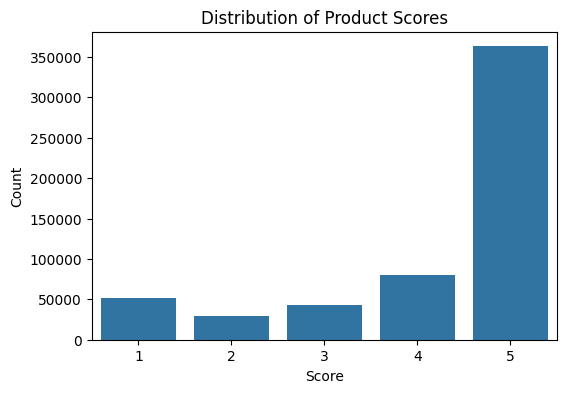

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Score', data=data)
plt.title('Distribution of Product Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

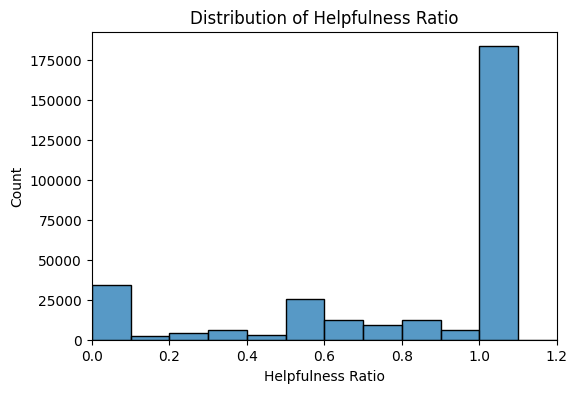

In [14]:
data['HelpfulnessRatio'] = data['HelpfulnessNumerator'] / data['HelpfulnessDenominator']
plt.figure(figsize=(6,4))
sns.histplot(data['HelpfulnessRatio'], bins=30)
plt.title('Distribution of Helpfulness Ratio')
plt.xlim(0,1.2)
plt.xlabel('Helpfulness Ratio')
plt.ylabel('Count')
plt.show()

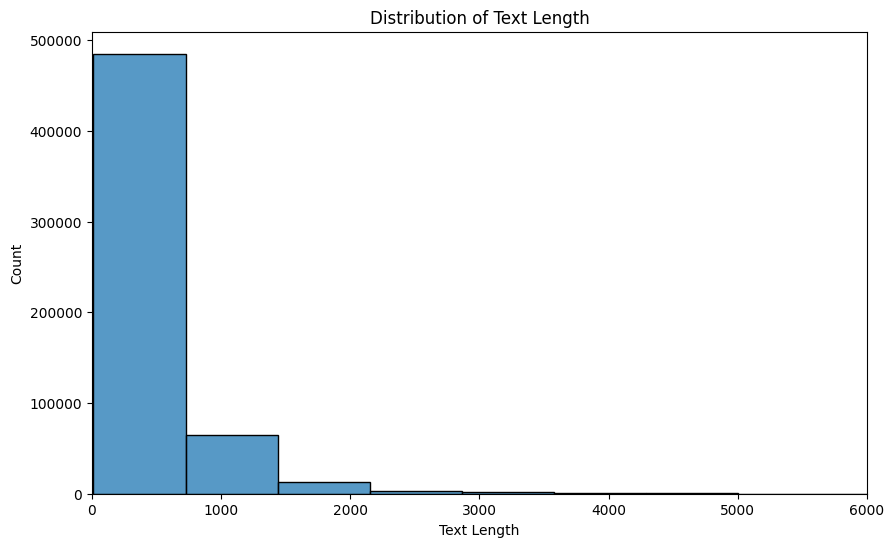

In [15]:
data['TextLength'] = data['Text'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['TextLength'], bins=30)
plt.title('Distribution of Text Length')
plt.xlabel('Text Length')
plt.xlim(0,6000)
plt.ylabel('Count')
plt.show()

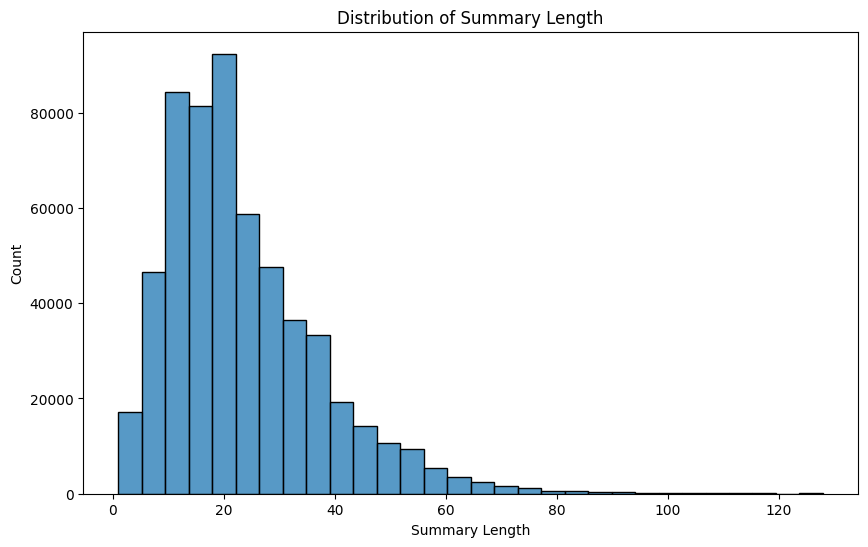

In [16]:
data['SummaryLength'] = data['Summary'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(data['SummaryLength'], bins=30)
plt.title('Distribution of Summary Length')
plt.xlabel('Summary Length')
plt.ylabel('Count')
plt.show()

In [17]:
demand = data['ProductId'].value_counts().reset_index()
demand.columns = ['ProductId', 'Demand']

In [18]:
top_10_demand_mean_ratings = data[data['ProductId'].isin(demand.head(10)['ProductId'])].groupby('ProductId')['Score'].mean().reset_index()
top_10_demand_mean_ratings = top_10_demand_mean_ratings.merge(demand.head(10), on='ProductId')

print("Top 10 Most Demanded Products with Mean Ratings:")
print(top_10_demand_mean_ratings)

Top 10 Most Demanded Products with Mean Ratings:
    ProductId     Score  Demand
0  B000VK8AVK  4.310284     564
1  B0013NUGDE  4.310284     564
2  B001EO5Q64  4.746032     567
3  B0026RQTGE  4.588608     632
4  B002QWHJOU  4.588608     632
5  B002QWP89S  4.588608     632
6  B002QWP8H0  4.588608     632
7  B003B3OOPA  4.739968     623
8  B007JFMH8M  4.582694     913
9  B007M83302  4.310284     564


In [19]:
top_10_rated_products = data.groupby('ProductId')['Score'].mean().reset_index().nlargest(10, 'Score')
top_10_rated_products = top_10_rated_products.merge(demand, on='ProductId')
print("\nTop 10 Most Rated Products :")
print(top_10_rated_products)


Top 10 Most Rated Products :
    ProductId  Score  Demand
0  141278509X    5.0       1
1  2841233731    5.0       1
2  9376674501    5.0       1
3  B00002Z754    5.0       2
4  B0000535LF    5.0       1
5  B00005C2JE    5.0       1
6  B00005V3DC    5.0       3
7  B0000643LM    5.0       3
8  B000069KQW    5.0       1
9  B00006L2ZT    5.0       8


In [20]:
top_10_least_rated_products = data.groupby('ProductId')['Score'].mean().reset_index().nsmallest(10, 'Score')
top_10_least_rated_products = top_10_least_rated_products.merge(demand, on='ProductId')

print("\nTop 10 Least Rated Products :")
print(top_10_least_rated_products)


Top 10 Least Rated Products :
    ProductId  Score  Demand
0  B00006IDJO    1.0       1
1  B000084ET4    1.0       1
2  B00008DFOM    1.0       1
3  B00008GKAV    1.0       2
4  B0000A1OEJ    1.0       1
5  B0000AH3OQ    1.0       1
6  B0000CEU8V    1.0       1
7  B0000CGFFI    1.0       1
8  B0000CNU0C    1.0       2
9  B0000CNU1A    1.0       1


In [21]:
# Find the top 10 least rated products with demand greater than 50
demand_filtered = demand[demand['Demand'] > 50]
mean_ratings = data.groupby('ProductId')['Score'].mean().reset_index()
merged_data = pd.merge(demand_filtered, mean_ratings, on='ProductId')

top_10_least_rated_products_demand_gt_50 = merged_data.nsmallest(10, 'Score')
print("\nTop 10 Least Rated Products with Demand > 50:")
print(top_10_least_rated_products_demand_gt_50)


Top 10 Least Rated Products with Demand > 50:
       ProductId  Demand     Score
595   B006N3I69A     131  1.343511
1035  B004H3N2LU      83  1.373494
337   B000X1Q1G8     184  1.695652
1687  B000PGE032      55  2.000000
1042  B0085MLY5A      82  2.439024
1043  B005BHIESC      82  2.439024
1652  B001C15JCU      56  2.589286
1493  B000EM9E2Y      60  2.600000
1067  B0014K91GY      80  2.675000
1393  B000ER5CTS      65  2.738462


In [22]:
product_demand = data['ProductId'].value_counts().reset_index()
product_demand.columns = ['ProductId', 'Demand']

# Calculate mean ratings for each product
mean_ratings = data.groupby('ProductId')['Score'].mean().reset_index()

# Merge demand data with mean ratings
merged_data = pd.merge(product_demand, mean_ratings, on='ProductId')

# Filter products with demand greater than 50
demand_filtered = merged_data[merged_data['Demand'] > 50]

# Find the top 10 highest rated products among those with demand > 50
top_10_highest_rated_products_demand_gt_50 = demand_filtered.nlargest(10, 'Score')
print("\nTop 10 Highest Rated Products with Demand > 50:")
print(top_10_highest_rated_products_demand_gt_50[['ProductId', 'Score', 'Demand']])


Top 10 Highest Rated Products with Demand > 50:
       ProductId     Score  Demand
727   B000ED9L9E  4.973451     113
759   B000O5DI1E  4.906542     107
1088  B001E6GFKI  4.887500      80
18    B000NMJWZO  4.881919     542
1581  B000CR1ELU  4.877193      57
960   B000G82L62  4.846154      91
179   B003QDRJXY  4.837121     264
949   B004UBZBMW  4.836957      92
590   B003KRHDMI  4.833333     132
401   B007R900WA  4.823529     170


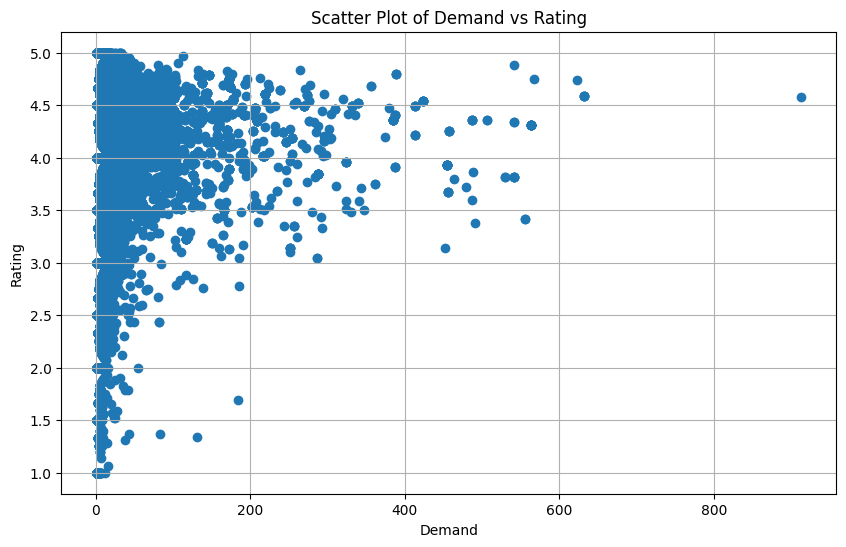

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Demand'], merged_data['Score'])
plt.title('Scatter Plot of Demand vs Rating')
plt.xlabel('Demand')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [24]:
good_reviews = data[data['Score'] >= 4]['Text'].sample(n=20000, random_state=42).str.cat(sep=' ') 
bad_reviews = data[data['Score'] < 4]['Text'].sample(n=20000, random_state=42).str.cat(sep=' ')   

In [25]:
wordcloud_good = WordCloud(width=800, height=400, background_color='white', max_words=150, min_font_size=10).generate(good_reviews)
wordcloud_bad = WordCloud(width=800, height=400, background_color='white', max_words=150, min_font_size=10).generate(bad_reviews)

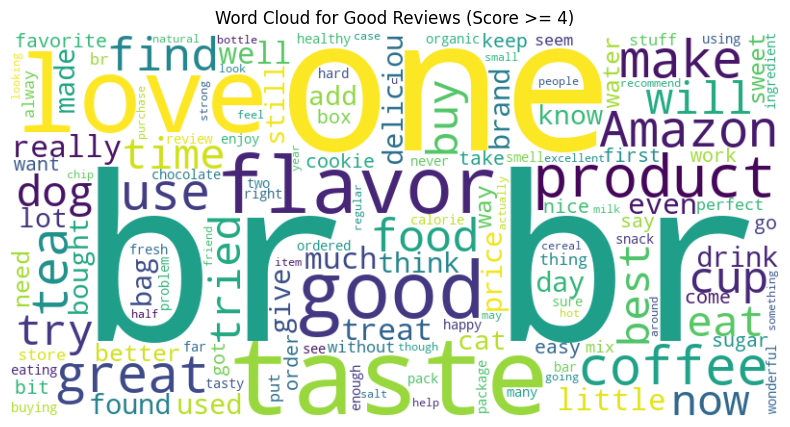

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_good, interpolation='bilinear')
plt.title('Word Cloud for Good Reviews (Score >= 4)')
plt.axis('off')
plt.show()

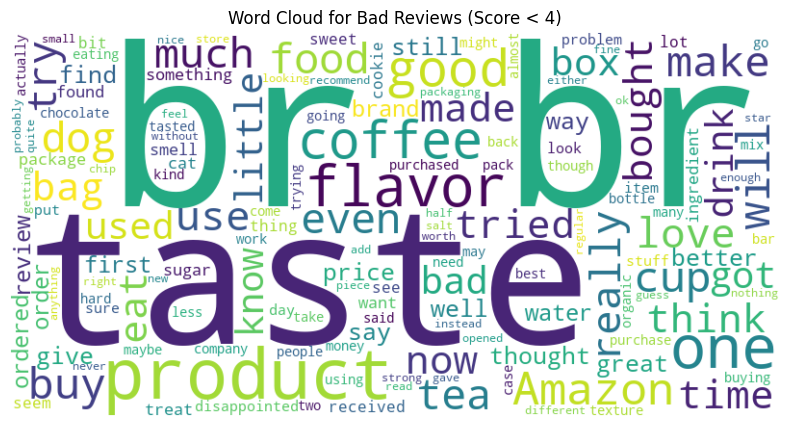

In [27]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bad, interpolation='bilinear')
plt.title('Word Cloud for Bad Reviews (Score < 4)')
plt.axis('off')
plt.show()

In [28]:
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

In [29]:
data.shape

(568409, 13)

In [30]:
def preprocess_text(text, remove_numbers=True, stemming=False):
    text = text.lower()
    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    text_tokens = word_tokenize(text)
    text = ' '.join([word for word in text_tokens if word not in stop_words])
    if remove_numbers:
        text = ''.join([i for i in text if not i.isdigit()])
    if stemming:
        stemmer = SnowballStemmer("english")
        text = ' '.join([stemmer.stem(word) for word in text.split()])
    else:
        lemmatizer = WordNetLemmatizer()
        text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

In [31]:
data['ProfileName'] = data['ProfileName'].astype('category')

In [32]:
chunk_size = 10000  
total_rows = len(data)
num_chunks = (total_rows // chunk_size) + 1 
processed_texts = []

In [33]:
for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = data.iloc[start:end]
    chunk['ProcessedText'] = chunk['Text'].astype(str) + ' ' + chunk['Summary'].astype(str)
    chunk['ProcessedText'] = chunk['ProcessedText'].apply(preprocess_text)
    processed_texts.append(chunk['ProcessedText'])
    print(f"Processed chunk {i+1}/{num_chunks} | Rows {start} to {end} of {total_rows}")

data['ProcessedText'] = pd.concat(processed_texts)
print("All text processing completed.")

Processed chunk 1/57 | Rows 0 to 10000 of 568409
Processed chunk 2/57 | Rows 10000 to 20000 of 568409
Processed chunk 3/57 | Rows 20000 to 30000 of 568409
Processed chunk 4/57 | Rows 30000 to 40000 of 568409
Processed chunk 5/57 | Rows 40000 to 50000 of 568409
Processed chunk 6/57 | Rows 50000 to 60000 of 568409
Processed chunk 7/57 | Rows 60000 to 70000 of 568409
Processed chunk 8/57 | Rows 70000 to 80000 of 568409
Processed chunk 9/57 | Rows 80000 to 90000 of 568409
Processed chunk 10/57 | Rows 90000 to 100000 of 568409
Processed chunk 11/57 | Rows 100000 to 110000 of 568409
Processed chunk 12/57 | Rows 110000 to 120000 of 568409
Processed chunk 13/57 | Rows 120000 to 130000 of 568409
Processed chunk 14/57 | Rows 130000 to 140000 of 568409
Processed chunk 15/57 | Rows 140000 to 150000 of 568409
Processed chunk 16/57 | Rows 150000 to 160000 of 568409
Processed chunk 17/57 | Rows 160000 to 170000 of 568409
Processed chunk 18/57 | Rows 170000 to 180000 of 568409
Processed chunk 19/57 | 

In [34]:
data['Sentiment'] = data['Score'].apply(lambda x: 1 if x >= 4 else 0)

In [35]:
data.Score.value_counts()

5    363110
4     80654
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data['ProcessedText'], data['Sentiment'], test_size=0.2, random_state=42)

In [37]:
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [38]:
from scipy.sparse import vstack
tfidf_vectorizer = TfidfVectorizer()

def process_chunks(vectorizer, data, fit=False):
    chunk_size = 10000  
    num_chunks = (len(data) // chunk_size) + 1
    processed_chunks = []
    for i in range(num_chunks):
        start = i * chunk_size
        end = start + chunk_size
        chunk = data[start:end]
        if fit and i == 0:  
            transformed_chunk = vectorizer.fit_transform(chunk)
        else:
            transformed_chunk = vectorizer.transform(chunk)
        processed_chunks.append(transformed_chunk)
    return processed_chunks

X_train_tfidf_chunks = process_chunks(tfidf_vectorizer, X_train, fit=True)
X_train_tfidf = vstack(X_train_tfidf_chunks)  

X_test_tfidf_chunks = process_chunks(tfidf_vectorizer, X_test)
X_test_tfidf = vstack(X_test_tfidf_chunks)  

print("Vectorization complete.")

Vectorization complete.


In [39]:
mnb_count = MultinomialNB()
mnb_count.fit(X_train_count, y_train)
predictions_mnb_count = mnb_count.predict(X_test_count)

print("MultinomialNB - CountVectorizer Accuracy:", accuracy_score(y_test, predictions_mnb_count))
print("Classification Report:\n", classification_report(y_test, predictions_mnb_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_mnb_count))

MultinomialNB - CountVectorizer Accuracy: 0.8942048873172533
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.73      0.75     24734
           1       0.93      0.94      0.93     88948

    accuracy                           0.89    113682
   macro avg       0.85      0.84      0.84    113682
weighted avg       0.89      0.89      0.89    113682

Confusion Matrix:
 [[18076  6658]
 [ 5369 83579]]


In [40]:
lr_count = LogisticRegression()
lr_count.fit(X_train_count, y_train)
predictions_lr_count = lr_count.predict(X_test_count)

print("Logistic Regression - CountVectorizer Accuracy:", accuracy_score(y_test, predictions_lr_count))
print("Classification Report:\n", classification_report(y_test, predictions_lr_count))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_lr_count))

Logistic Regression - CountVectorizer Accuracy: 0.9163719850108196
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80     24734
           1       0.93      0.96      0.95     88948

    accuracy                           0.92    113682
   macro avg       0.89      0.86      0.87    113682
weighted avg       0.91      0.92      0.91    113682

Confusion Matrix:
 [[18715  6019]
 [ 3488 85460]]


In [41]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)
predictions_lr_tfidf = lr_tfidf.predict(X_test_tfidf)

print("Logistic Regression - TFIDF Accuracy:", accuracy_score(y_test, predictions_lr_tfidf))
print("Classification Report:\n", classification_report(y_test, predictions_lr_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_lr_tfidf))

Logistic Regression - TFIDF Accuracy: 0.9128709910100103
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.73      0.79     24734
           1       0.93      0.96      0.95     88948

    accuracy                           0.91    113682
   macro avg       0.89      0.85      0.87    113682
weighted avg       0.91      0.91      0.91    113682

Confusion Matrix:
 [[18179  6555]
 [ 3350 85598]]


In [42]:
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train_tfidf, y_train)
predictions_mnb_tfidf = mnb_tfidf.predict(X_test_tfidf)

print("MultinomialNB - TFIDF Accuracy:", accuracy_score(y_test, predictions_mnb_tfidf))
print("Classification Report:\n", classification_report(y_test, predictions_mnb_tfidf))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions_mnb_tfidf))

MultinomialNB - TFIDF Accuracy: 0.8537939163631886
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.37      0.52     24734
           1       0.85      0.99      0.91     88948

    accuracy                           0.85    113682
   macro avg       0.87      0.68      0.72    113682
weighted avg       0.86      0.85      0.83    113682

Confusion Matrix:
 [[ 9118 15616]
 [ 1005 87943]]


In [43]:
sia = SentimentIntensityAnalyzer()
predictions = X_test.apply(lambda text: 1 if sia.polarity_scores(text)['compound'] >= 0 else 0).astype(int)

accuracy = accuracy_score(y_test, predictions)
print("NLTK SIA Polarity Scores Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

NLTK SIA Polarity Scores Accuracy: 0.8196988089583224
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.26      0.39     24734
           1       0.83      0.97      0.89     88948

    accuracy                           0.82    113682
   macro avg       0.78      0.62      0.64    113682
weighted avg       0.81      0.82      0.78    113682

Confusion Matrix:
 [[ 6503 18231]
 [ 2266 86682]]


In [44]:
accuracy_lr_count = accuracy_score(y_test, predictions_lr_count)
accuracy_mnb_count = accuracy_score(y_test, predictions_mnb_count)
accuracy_lr_tfidf = accuracy_score(y_test, predictions_mnb_tfidf)
accuracy_mnb_tfidf = accuracy_score(y_test, predictions_lr_tfidf)
sia_accuracy = accuracy_score(y_test, predictions)
model_accuracies = {
    "Logistic Regression - CountVectorizer": accuracy_lr_count,
    "MultinomialNB - CountVectorizer": accuracy_mnb_count,
    "Logistic Regression - TFIDF": accuracy_lr_tfidf,
    "MultinomialNB - TFIDF": accuracy_mnb_tfidf,
    "NLTK SIA Polarity Scores": sia_accuracy  
}

accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False)
accuracy_df.reset_index(drop=True)

,Model,Accuracy
0,Logistic Regression - CountVectorizer,0.916372
1,MultinomialNB - TFIDF,0.912871
2,MultinomialNB - CountVectorizer,0.894205
3,Logistic Regression - TFIDF,0.853794
4,NLTK SIA Polarity Scores,0.819699


In [45]:
X_all = count_vectorizer.transform(data['ProcessedText'])
predicted_scores = lr_count.predict_proba(X_all)[:, 1]  

In [46]:
data['predicted_scores'] = predicted_scores
product_info = data.groupby('ProductId').agg(predicted_score=('predicted_scores', 'mean'), 
                                             demand=('ProductId', 'size')).reset_index()

In [47]:
bin_edges = [0, 0.2, 0.4, 0.6, 0.8, 1] 
labels = ['very dissatisfied', 'dissatisfied', 'neutral', 'satisfied', 'very satisfied']
product_info['Segment'] = pd.cut(product_info['predicted_score'], bins=bin_edges, labels=labels, include_lowest=True)
product_info.head()

,ProductId,predicted_score,demand,Segment
0,0006641040,0.900014,37,very satisfied
1,141278509X,0.996451,1,very satisfied
2,2734888454,0.439534,2,neutral
3,2841233731,0.999753,1,very satisfied
4,7310172001,0.915812,173,very satisfied


In [48]:
product_info.Segment.value_counts()

very satisfied       45611
satisfied            14124
neutral               6934
very dissatisfied     4900
dissatisfied          2689
Name: Segment, dtype: int64

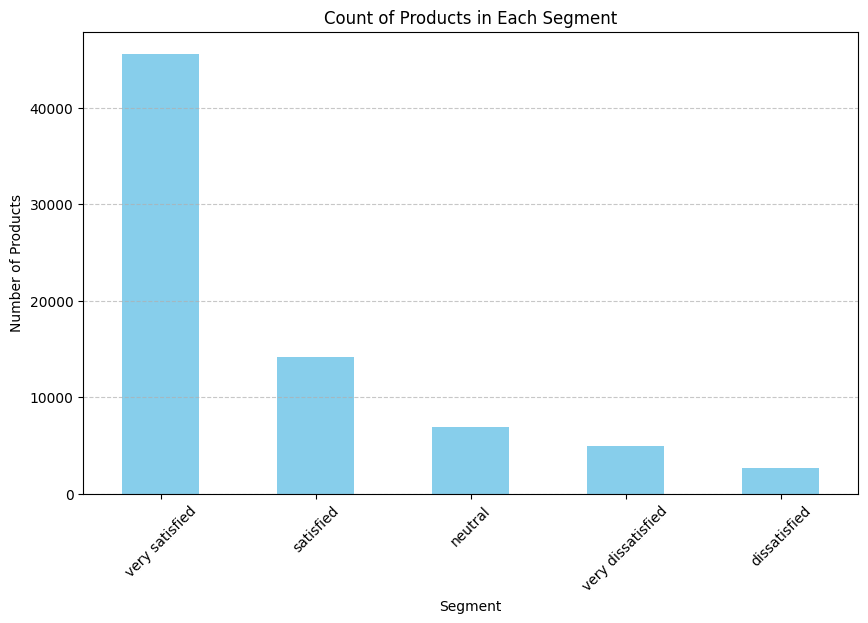

In [49]:
segment_counts = product_info['Segment'].value_counts()
plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Products in Each Segment')
plt.xlabel('Segment')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()

In [50]:
very_satisfied_products = product_info[product_info['Segment'] == 'very satisfied']

# Find top 10 products with the highest predicted scores in 'very satisfied'
top_10_very_satisfied = very_satisfied_products.nlargest(10, 'predicted_score')
print("Top 10 Products with Highest Rating in Very Satisfied Segment:")
print(top_10_very_satisfied[['ProductId', 'predicted_score', 'demand']])

Top 10 Products with Highest Rating in Very Satisfied Segment:
        ProductId  predicted_score  demand
62553  B0051BWU92              1.0       1
70529  B007B24NKS              1.0       1
60002  B004R6F88W              1.0       1
42026  B002P0Q14C              1.0       1
69390  B006RNQ7YW              1.0       1
72981  B008ADQNXW              1.0       1
72982  B008ADQNZA              1.0       1
72983  B008ADQO1I              1.0       1
26500  B001B4NFXI              1.0       1
10105  B000FDCVOK              1.0       1


In [51]:
very_satisfied_high_demand = very_satisfied_products[very_satisfied_products['demand'] > 50]

# Find top 10 products with the highest predicted scores and demand > 50
top_10_very_satisfied_high_demand = very_satisfied_high_demand.nlargest(10, 'predicted_score')
print("Top 10 Products with Highest Rating in Very Satisfied Segment When Demand > 50:")
print(top_10_very_satisfied_high_demand[['ProductId', 'predicted_score', 'demand']])

Top 10 Products with Highest Rating in Very Satisfied Segment When Demand > 50:
        ProductId  predicted_score  demand
71762  B007R900WA         0.963563     170
16945  B000NMJWZO         0.959024     542
49159  B003QDRJXY         0.958701     264
63244  B0054TWQMM         0.957322      73
60828  B004UC7CMS         0.949792      82
28045  B001E5E3UI         0.948855      57
19356  B000SMN0DO         0.945624      53
42832  B002TXT502         0.942035      95
47846  B003KRHDMI         0.940239     132
7151   B000BXSTY0         0.939915      67


In [52]:
very_dissatisfied_products = product_info[product_info['Segment'] == 'very dissatisfied']

# Find worst 10 products with the lowest predicted scores in 'very dissatisfied'
worst_10_very_dissatisfied = very_dissatisfied_products.nsmallest(10, 'predicted_score')
print("Worst 10 Products with Lowest Rating in Very Dissatisfied Segment:")
print(worst_10_very_dissatisfied[['ProductId', 'predicted_score', 'demand']])

Worst 10 Products with Lowest Rating in Very Dissatisfied Segment:
        ProductId  predicted_score  demand
42863  B002U3S3V8     9.871477e-11       1
932    B0000DNS4J     5.001467e-10       2
56065  B004CH7A7S     5.467135e-10       1
34878  B001QECTZ8     6.356399e-10       1
48471  B003NCIDFG     6.356399e-10       1
69792  B006YZS7U0     1.710558e-09       1
43584  B002X9HAV8     6.387316e-09       1
26795  B001BOTD4S     1.197175e-08       1
36062  B001SG0FI2     1.626216e-08       1
21191  B000WW22RA     1.687472e-08       1


In [53]:
very_dissatisfied_high_demand = very_dissatisfied_products[very_dissatisfied_products['demand'] > 50]

# Find worst 2 products with the lowest predicted scores and demand > 50
worst_2_very_dissatisfied_high_demand = very_dissatisfied_high_demand.nsmallest(2, 'predicted_score')
print("Worst 2 Products with Lowest Rating in Very Dissatisfied Segment When Demand > 50:")
print(worst_2_very_dissatisfied_high_demand[['ProductId', 'predicted_score', 'demand']])

Worst 2 Products with Lowest Rating in Very Dissatisfied Segment When Demand > 50:
        ProductId  predicted_score  demand
69165  B006N3I69A         0.168500     131
57259  B004H3N2LU         0.189485      83
